<a href="https://colab.research.google.com/github/kamranjaved/Workshop-on-AI-and-Hand-on-training/blob/main/S5%3A%20Urdu%20Tweets%20Sentiment%20Analysis%20with%20RNN/Urdu%20Tweets%20Sentiment%20Analysis%20with%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweets Sentiment Analysis with LSTM

We will use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras.  Conveniently, Keras has a built-in IMDb movie reviews dataset that we can use.

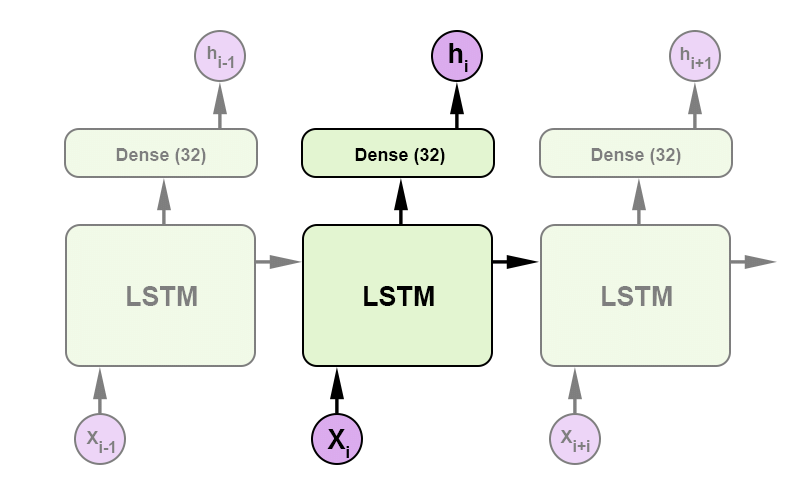

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install urduhack
import urduhack

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/urdu2.csv')

In [ ]:
df.head()

,Tweet,Class,Label
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P,1
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N,0
2,ٹویٹر کا خیال کیسے آیا ؟,O,1
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P,1
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P,1


In [ ]:
df.Tweet[0]

'میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب کوٹ لکھپت والی اتفاق فیکٹری میں نہیں بنتا۔ایٹم بم کہوٹہ کی ایٹمی۔۔۔ '

In [ ]:

df=pd.read_csv('/content/drive/My Drive/urdu2.csv')
import urduhack

# Downloading models
urduhack.download()


for ctr in range(len(df.Tweet)):
  split_text = []
  sentence = df.Tweet[ctr]
  for word in sentence.split():
    split_text.append(word)
  df.Tweet[ctr] = split_text
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tweet,Class,Label
0,"[میں, نے, ایٹم, بم, بنایا, ھے, ۔۔۔۔او, بھائی, ...",P,1
1,"[چندے, سے, انقلاب, اور, عمران, خان, وزیر, اعظم...",N,0
2,"[ٹویٹر, کا, خیال, کیسے, آیا, ؟]",O,1
3,"[سرچ, انجن, گوگل, کے, نائب, صدر, نے, فضا, میں,...",P,1
4,"[ابھی, تک, اسکی, لہریں, کبھی, کبھی, آ, جاتی, ہ...",P,1
...,...,...,...
995,"[اُس, آدمی, نے, اِس, سالار, کو, کافی, معقول, ٹ...",P,1
996,"[چچا, غالب, کی, روح, سے, معذرت, کے, ساتھہم, نے...",P,1
997,"[واہ, جناب, واہ!, اچھی, رہی۔, جناب, خود, کو, ف...",P,1
998,"[اسلام, آباد, :پی, اے, ٹی, کا, دھرنا, ختم،, صف...",P,1


In [ ]:
len(df.Tweet)

1000

In [ ]:

import itertools
all_tokens = itertools.chain.from_iterable(df.Tweet)
Vocabulary = {token: idx for idx, token in enumerate(set(all_tokens))}

In [ ]:
Vocabulary['حکم']

3462

In [ ]:
len(Vocabulary)

5701

In [ ]:
df=pd.read_csv('/content/drive/My Drive/urdu2.csv')
import urduhack
# Downloading models
urduhack.download()


for ctr in range(len(df.Tweet)):
  split_ids = []
  sentence = df.Tweet[ctr]
  for word in sentence.split():
     split_ids.append(Vocabulary[word])


  df.Tweet[ctr] = split_ids

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tweet,Class,Label
0,"[117, 4565, 4992, 5668, 1703, 5232, 1579, 1664...",P,1
1,"[4184, 2129, 2821, 2213, 2332, 5377, 3753, 752...",N,0
2,"[560, 4142, 175, 3543, 5540, 4076]",O,1
3,"[188, 668, 1555, 2476, 4463, 2773, 4565, 763, ...",P,1
4,"[1609, 1662, 3149, 4045, 3266, 3266, 4577, 258...",P,1
...,...,...,...
995,"[5518, 4476, 4565, 3814, 1148, 254, 3396, 717,...",P,1
996,"[5077, 4116, 2643, 1690, 2129, 4563, 2476, 244...",P,1
997,"[67, 4030, 3208, 1790, 1526, 4030, 1893, 254, ...",P,1
998,"[5129, 3809, 89, 5062, 5241, 4142, 3289, 1041,...",P,1


In [ ]:
import numpy as np
Label = df.Label
Tweet = df.Tweet
Data = [Label, Tweet]
print(np.shape(Data))


In [ ]:
#Import Module
from sklearn.model_selection import train_test_split


train_X_urdu, test_X_urdu, train_y_urdu, test_y_urdu = train_test_split( df.Tweet, df.Label,
                                                    train_size=0.7,
                                                    test_size=0.3
                                                    )

In [ ]:
train_X_urdu

In [ ]:
y_train = train_y_urdu
y_test =  test_y_urdu
X_train = train_X_urdu
X_test =  test_X_urdu

In [ ]:
vocabulary_size = 6000

In [ ]:
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 700 training samples, 300 test samples


In [ ]:
len(X_test)

In [ ]:
# print(len(y_test))
# print(len(max((X_train))))
print('Maximum Tweet length: {}'.format( max( len(max(X_train)) , len(max(X_test)))))
print('Minimum Tweet length: {}'.format( min( len(min(X_train)) , len(min(X_test)))))


Maximum Tweet length: 23
Minimum Tweet length: 1


In [ ]:

from keras.datasets import imdb

In [ ]:
vocabulary_size = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

 Inspect a sample review and its label

Map word IDs back to words

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

Maximum review length and minimum review length

In [ ]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

In [ ]:
max_words = max( len(max((X_train))) , len(max((X_test))))
print('Minimum Tweet length: {}'.format(
max( len(max((X_train))) , len(max((X_test))))))

### Pad sequences

In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. For now, set max_words to 500.

In [ ]:
type(X_train)

In [ ]:
max_words = 500

In [ ]:
from keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
                                #  ,  dtype='float', padding='pre',  truncating='pre', value=0.0)
# , dtype='object')
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
                                # ,  dtype='float', padding='pre',  truncating='pre', value=0.0)
                                # , dtype='object')

### TODO: Design an RNN model for sentiment analysis

Build our model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that our input is a sequence of words (technically, integer word IDs) of maximum length = max_words, and our output is a binary sentiment label (0 or 1).

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           192000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None


To summarize, our model is a simple RNN model with 1 embedding, 1 LSTM and 1 dense layers. 213,301 parameters in total need to be trained.

### Train and evaluate our model

We first need to compile our model by specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics we'd like to measure. Specify the approprate parameters, including at least one metric 'accuracy'.

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Once compiled, we can kick off the training process. There are two important training parameters that we have to specify - batch size and number of training epochs, which together with our model architecture determine the total training time.

Training may take a while, so grab a cup of coffee, or better, go for a run!

In [ ]:
batch_size = 10
num_epochs = 5

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
70/70 [==============================] - 19s 253ms/step - loss: 0.6936 - accuracy: 0.5428 - val_loss: 0.6816 - val_accuracy: 0.8000
Epoch 2/5
70/70 [==============================] - 17s 247ms/step - loss: 0.6872 - accuracy: 0.7134 - val_loss: 0.5894 - val_accuracy: 0.9000
Epoch 3/5
70/70 [==============================] - 17s 247ms/step - loss: 0.5453 - accuracy: 0.8758 - val_loss: 0.3762 - val_accuracy: 0.9000
Epoch 4/5
70/70 [==============================] - 17s 247ms/step - loss: 0.3122 - accuracy: 0.9573 - val_loss: 0.1807 - val_accuracy: 0.9000
Epoch 5/5
70/70 [==============================] - 17s 246ms/step - loss: 0.1050 - accuracy: 0.9916 - val_loss: 0.1561 - val_accuracy: 0.9000


scores[1] will correspond to accuracy if we pass metrics=['accuracy']

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8954396843910217
